<hr style="height:10px">

<div class='container2'>
	<h1> Trabalho 02 -Aprendizado de Máquina - CSI704</h1>
    <h2>UFOP - DECSI</h2>
</div>

<hr style="height:5px">
    
<h2>Análise e Preparação dos Dados</h2>

Modificado do original desenvolvido por: <a href="http://lattes.cnpq.br/2532893661927339">Renato Moraes Silva</a> para [2].

<hr style="height:2px">

# Integrantes do grupo:

* Gabriel Augusto Rocha Calhabeu - 20.1.8039
* Victor Gabriel Siqueira Moura - 20.1.8149
* Yuri Maycon da Silva Ribeiro - 19.2.8119






## Introdução

Frequentemente, a visualização dos dados auxilia na interpretação e na análise de como eles estão distribuídos. O Python possui algumas bibliotecas que facilitam o processo de visualização, tais como: `Pandas`, `Matplotlib` e `Seaborn`. Para este trabalho estaremos utilizando a base de dados Wine. A versão original dela pode ser encontrada no seguinte link: <https://archive.ics.uci.edu/ml/datasets/wine>. Será feita a eliminação de atributos irrelevantes e o tratamento de valores faltantes. Também será realizado o tratamento dos valores redundantes ou inconsistentes e também a normalização dos dados. Depois, será feita a detecção e remoção de *outliers* da base dados. Ainda, será feita a análise da distribuição das classes e da correlação entre os atributos. Por fim, a base agora tratada, será aplicada aos algoritmos KNN e a Rede MLP.

---
## Recursos Necessários

Para este *notebook*, deve ser utilizado o `Python 3.5` ou superior com as seguintes bibliotecas externas, que deverão ser instaladas:

* [`matplotlib`](https://matplotlib.org/) (versão 3.1.3 ou superior): construção e exibição de gráficos variados
* [`seaborn`](https://seaborn.pydata.org/) (versão 0.10.0 ou superior): construção e exibição de gráficos variados
* [`numpy`](https://numpy.org) (versão 1.16.2 ou superior): manipulação de dados em formato de vetores e matrizes
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html) (versão 0.24.1 ou superior): manipulação de dados em formato de tabelas

Será necessário que nos arquivos seja colocado o database *wine* em formato de arquivo `.csv`.

---
## Carregando os dados

Primeiro, iremos importar todas as bibliotecas que serão usadas ao longo deste notebook.

In [ ]:
# -*- coding: utf-8 -*-

import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados

# bibliotecas usadas para geracao de graficos
import seaborn as sns
import matplotlib.pyplot as plt

print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


Em seguida, os dados serão carregados do arquivo.

In [ ]:
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'wine.csv', sep=',', index_col=None, header=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!


Agora, vamos dar uma olhada nas 10 primeiras amostras da base de dados.

In [ ]:
# exibe o dataframe
display(df_dataset.head(n=10))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


A base de dados contém amostras vinhos contendo um total de 13 atributos e um último atributo classe. Os atributos são 1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline sendo o último atributo o identifador de classe que varia entre 1-3.

os 13 atributos são todos descritivos e o atributo classe é um atributo meta.

## Pré-processamento: eliminação de atributos irrelevantes

Aqui atributos considerados irrelevantes podem ser removidos. Porém para esta base, não temos atributos deste tipo.

## Pré-processamento: tratamento de atributos com valores ausentes

Outro passo importante, é verificar se existem atributos com valores ausentes (*NaN*) na base de dados.

In [ ]:
# índices das linhas que contém valores NaN
idxRowNan = pd.isnull(df_dataset).any(1).to_numpy().nonzero()

# imprime apenas as linhas com valoes ausentes
display(df_dataset.iloc[idxRowNan])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13


Como podemos ver, a base também não possui valores faltantes e portanto não há tratamento para ser realizado.

## Pré-processamento: tratamento de dados inconsistentes ou redundantes

Outro passo importante, é verificar se existem dados inconsistentes ou redundantes. A forma mais comum de inconsistência é quando há amostras representadas por atributos com todos os valores iguais, mas com classes diferentes. A redundância é dada pela repetição de linhas na base de dados.

A seguir, vamos verificar se existem amostras duplicadas (redundantes) e inconsistentes.

In [ ]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=[0,1,2,3,4,5,6,7,8,9,10,11,12],keep=False)]

# se houver valores redundantes ou inconsistentes, imprima
if len(df_duplicates)>0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem valores duplicados')

Não existem valores duplicados


Percebemos aqui também que a base não possui valores duplicados e portanto também não há necessidade de algum tipo de tratamento.

Porém ainda é preciso checar se há amostras inconsistentes.

In [ ]:
# para detectar inconsistências, a rotina abaixo obtém as amostras onde os valores
# dos atributos continuam duplicados. Neste caso, os atributos serão iguais, mas as classes serão distintas
df_duplicates = df_dataset[ df_dataset.duplicated(subset=[0,1,2,3,4,5,6,7,8,9,10,11,12],keep=False)]

# se tiver valores inconsistentes, imprime
if len(df_duplicates)>0:
    print('\nAmostras inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem mostras inconsistentes')


Não existem mostras inconsistentes


Não temos amostras inconsistentes e portanto, mais uma vez, não há necessidade de tratamento.

# Algumas estatísticas sobre a base de dados.

A função `describe()` da `Pandas` sumariza as principais estatísticas sobre os dados de um *data frame*, como a média, o desvio padrão, valor máximo, valor mínimo e alguns percentis.

In [ ]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df_dataset.describe()

display(df_detalhes)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


## Pré-processamento: normalização dos atributos

Deve-se normalizar os valores dos atributos para que fiquem com média igual a zero e desvio padrão igual a um. Usando a biblioteca *scikit-learn*, é possível fazer a normalização usando a função [*sklearn.preprocessing.StandardScaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Mas, para exercitar os conceitos aprendidos, será criada a própria função de normalização.

In [ ]:
def normalizar(X):
    """
    Normaliza os atributos em X

    Esta função retorna uma versao normalizada de X onde o valor da
    média de cada atributo é igual a 0 e desvio padrao é igual a 1. Trata-se de
    um importante passo de pré-processamento quando trabalha-se com
    métodos de aprendizado de máquina.
    """

    m, n = X.shape # m = qtde de objetos e n = qtde de atributos por objeto

    # Incializa as variaves de saída
    X_norm = np.random.rand(m,n) # inicializa X_norm com valores aleatórios
    mu = 0 # inicializa a média
    sigma = 1 # inicializa o desvio padrão

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)

    for i in range(m):
        X_norm[i,:] = (X[i,:]-mu) / sigma


    return X_norm, mu, sigma


# coloca os valores dos atributos na variável X
X = df_dataset.iloc[:,0:-1].values

# chama a função para normalizar X
X_norm, mu, sigma = normalizar(X)

df_dataset.iloc[:,0:-1] = X_norm

print('\nPrimeira amostra da base antes da normalização: [%2.4f %2.4f].' %(X[0,0],X[0,1]))
print('\nPrimeira amostra da base apos normalização: [%2.4f %2.4f].' %(X_norm[0,0],X_norm[0,1]))



Primeira amostra da base antes da normalização: [14.2300 1.7100].

Primeira amostra da base apos normalização: [1.5143 -0.5607].


Agora que os dados estão normalizados, analisa-se as informações estatísticas novamente.

In [ ]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df_dataset.describe()

display(df_detalhes.round(8))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,1.938202
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.775035
min,-2.427388,-1.428952,-3.668813,-2.663505,-2.082381,-2.101318,-1.691200,-1.862979,-2.063214,-1.629691,-2.088840,-1.889723,-1.488987,1.000000
25%,-0.786027,-0.656896,-0.570513,-0.687199,-0.822096,-0.882977,-0.825211,-0.738059,-0.595603,-0.792866,-0.765403,-0.949570,-0.782431,1.000000
50%,0.060828,-0.421922,-0.023754,0.001514,-0.121938,0.095690,0.105851,-0.175599,-0.062721,-0.158777,0.033034,0.237066,-0.233063,2.000000
75%,0.833777,0.667909,0.696145,0.600395,0.508205,0.806722,0.846697,0.607827,0.627406,0.492567,0.711158,0.786369,0.756117,3.000000
max,2.253415,3.100446,3.147447,3.145637,4.359076,2.532372,3.054216,2.395645,3.475269,3.425768,3.292407,1.955399,2.963114,3.000000


Pode-se ver acima que a média (*mean*) ficou igual a 0 e o desvio padrão (*std*) igual a 1.

## Pré-processamento: detecção de *outliers*

Outro passo importante na análise e tratamento dos dados é a detecção de *outliers* (*i.e.*, dados gerados por leituras incorretas, erros de digitação, etc).

Uma das maneiras mais simples de verificar se os dados contém *outliers* é criar um gráfico box plot de cada atributo. Para isso, podemos usar a função `boxplot` da biblioteca `Pandas`.

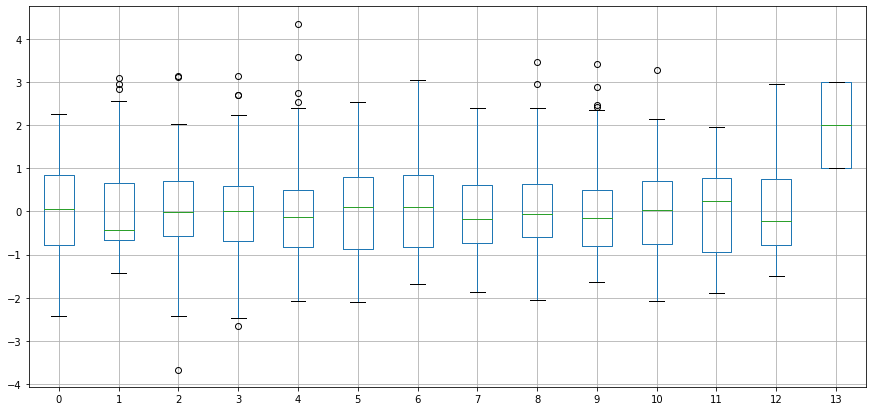

In [ ]:
# gera um bloxplot para cada atributo
df_dataset.boxplot(figsize=(15,7))
plt.show()

O box plot está indicando que os atributos 1, 2, 3, 4, 8, 9 e 10 possuem *outliers*, o que pode prejudicar o desempenho de vários métodos de aprendizado de máquina, pois tratam-se de amostras com valores de atributos incorretos.

Outra forma de analisar se a base de dados contém *outliers* é usar gráficos de dispersão. Pode-se plotar gráficos de dispersão de todas as combinações de atributos da base de dados usando a função `scatter_matrix` da `Pandas`.

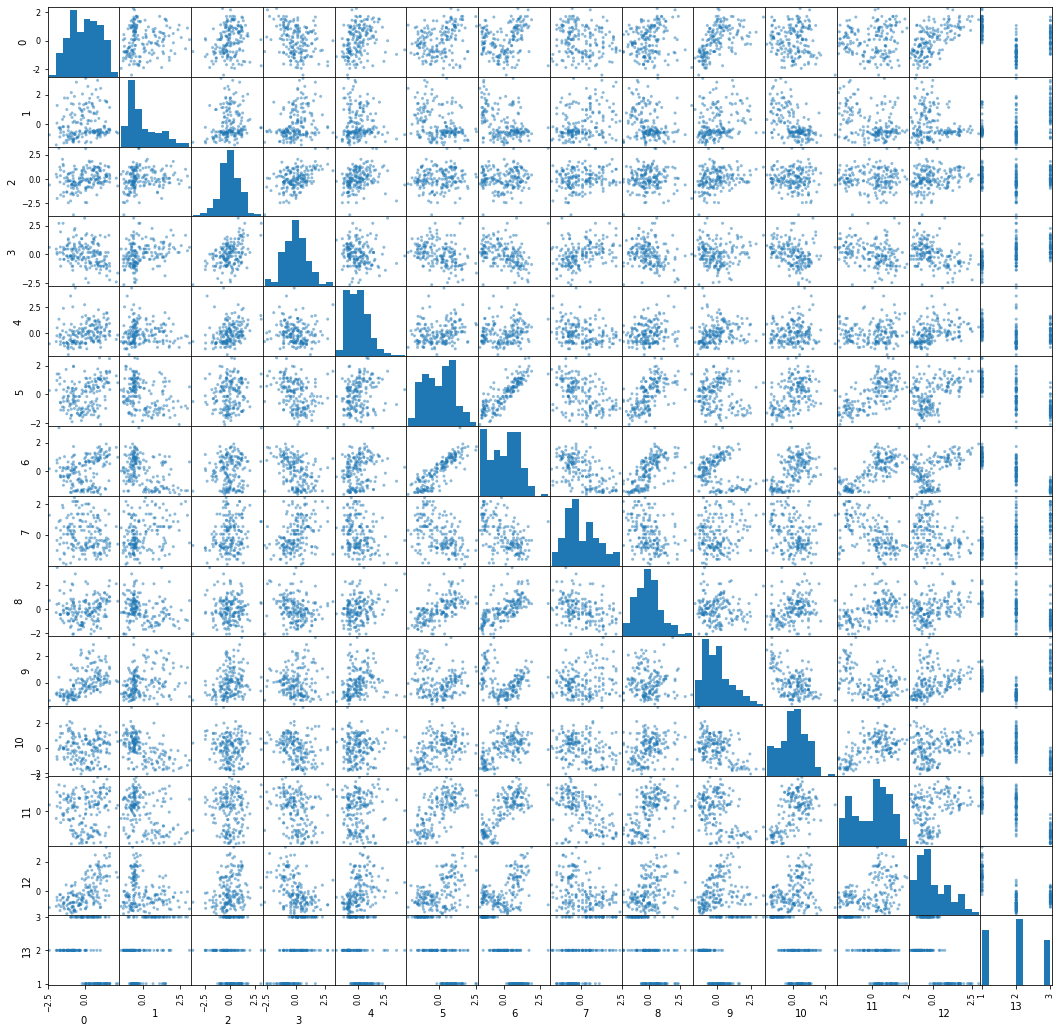

In [ ]:
pd.plotting.scatter_matrix(df_dataset, figsize=(18,18))

plt.show()

Outra forma de plotar gráficos de dispersão a partir dos _dataframes_ é usando a biblioteca `Seaborn`. Juntamente com essa biblioteca, também é recomendável importar a biblioteca `Matplotlib` para personalizar os gráficos.

**O tempo de execução desta função está muito longo e por isso o bloco está comentado. Caso precise, basta descomentar o bloco e rodar.

In [ ]:
# # matriz de gráficos scatter
# sns.pairplot(df_dataset, hue=13, height=3.5);

# # mostra o gráfico usando a função show() da matplotlib
# plt.show()

Pelos gráficos vistos até o momento, fica que temos diversos *outliers* em diversos atributos diferentes.

A bilioteca `Seaborn` permite criar gráficos boxplot agrupados por um determinado atributo, o que facilita a análise dos dados. No exemplo abaixo, criaremos boxplots para cada atributo agrupados pela classe que estão na coluna 13 do database.

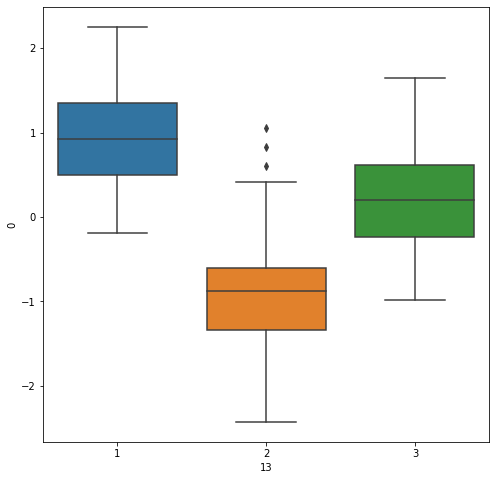

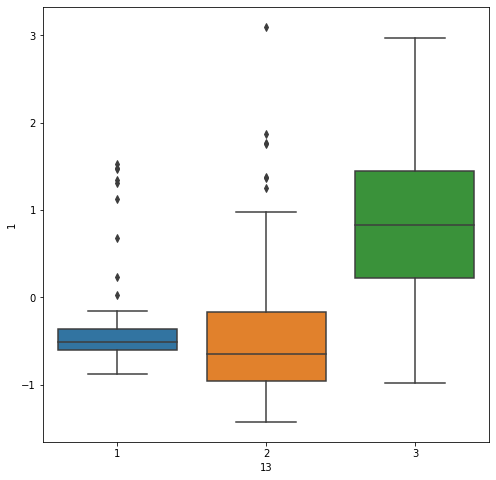

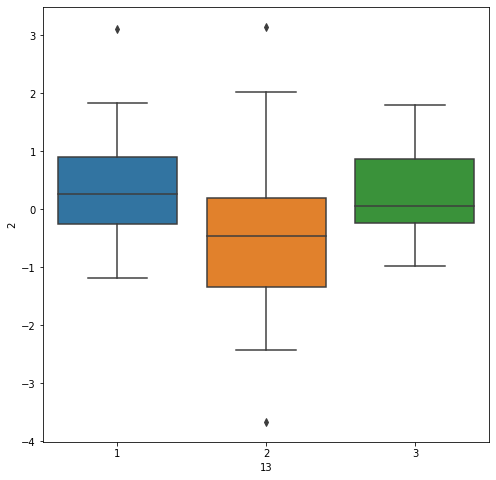

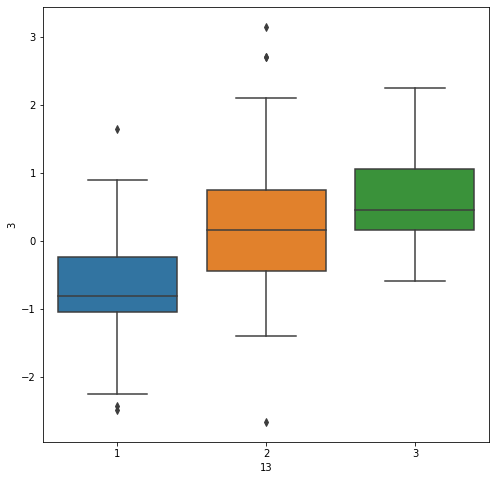

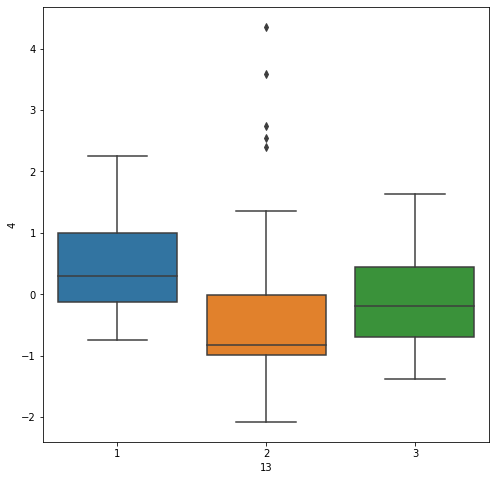

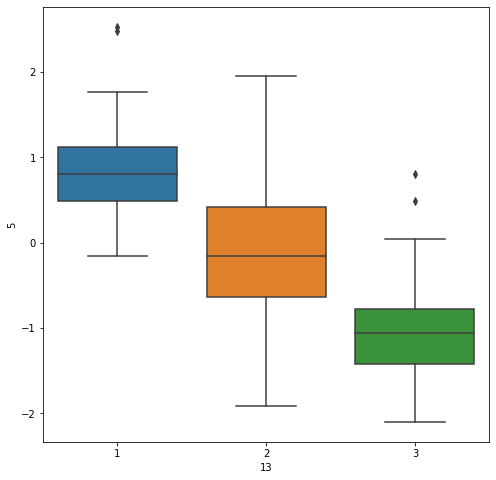

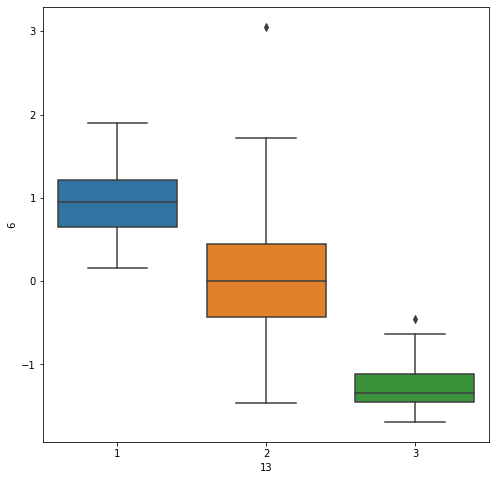

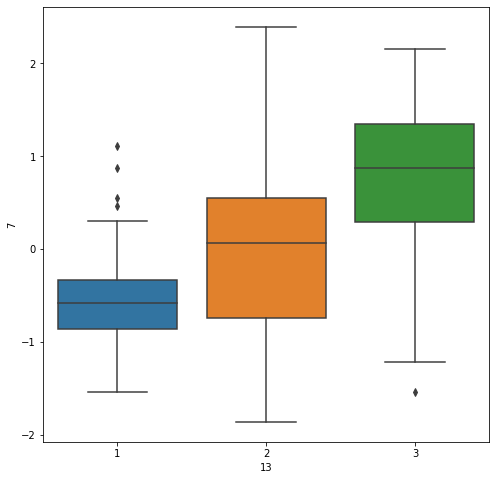

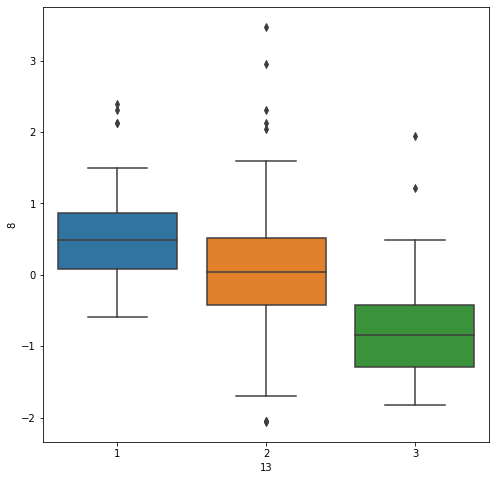

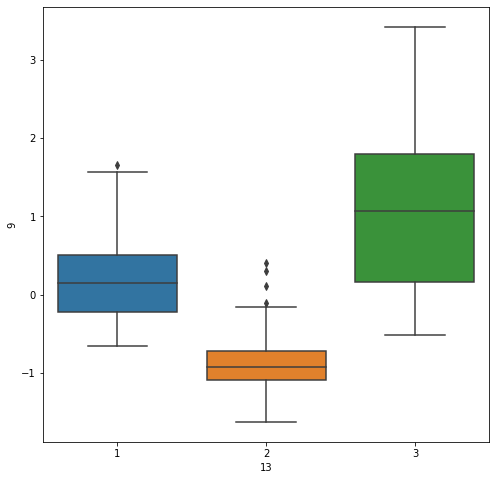

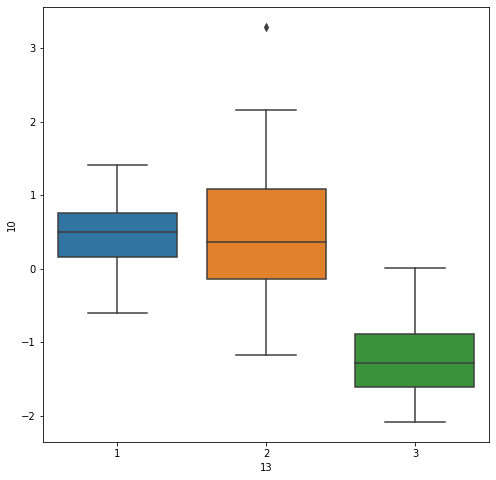

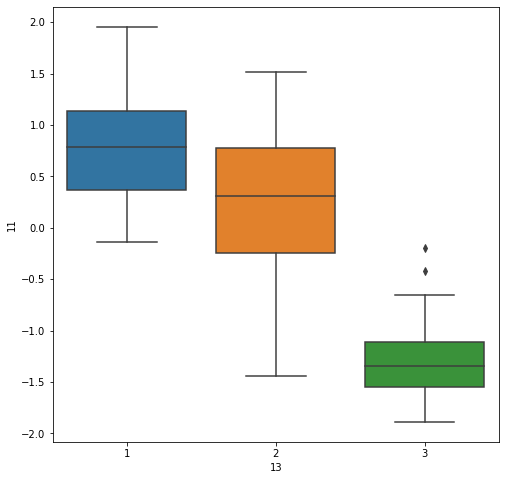

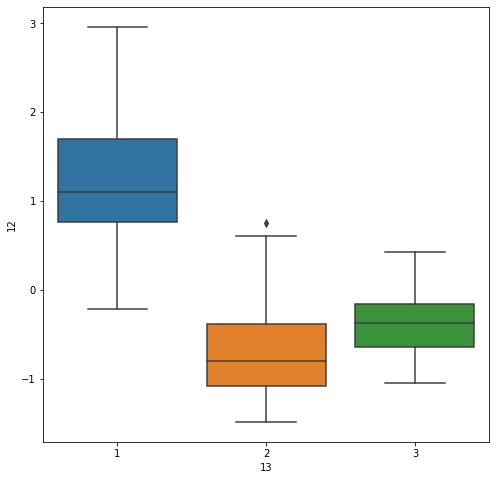

In [ ]:
for atributo in df_dataset.columns[:-1]:
    # define a dimensão do gráfico
    plt.figure(figsize=(8,8))

    # cria o boxplot
    sns.boxplot(x=13, y=atributo, data=df_dataset, whis=1.5)

    # mostra o gráfico
    plt.show()

Os box plots dos atributos mostraram outros *outliers* que não haviam aparecido no primeiro box plot. Portanto, esses novos valores são considerados *outliers* se analisarmos as classes individualmente, mas não são considerados *outliers* se analisarmos a base de dados de forma geral.

Outro tipo de gráfico que ajuda a detectar *outliers* é o histograma. Portanto, será usado para analisar cada atributo.

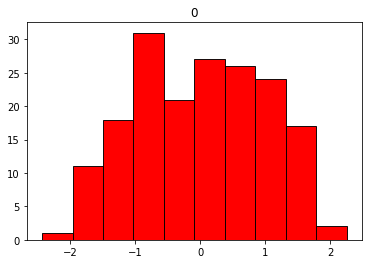

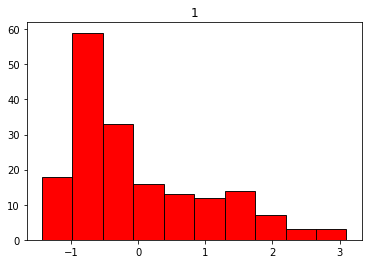

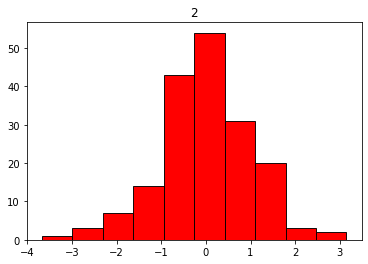

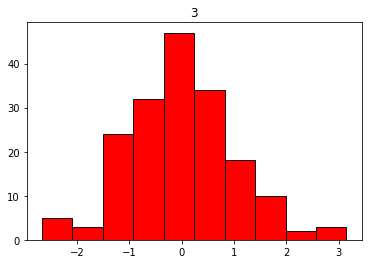

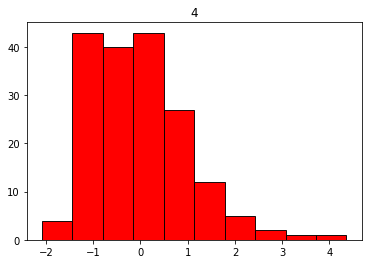

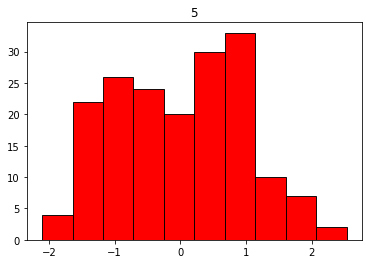

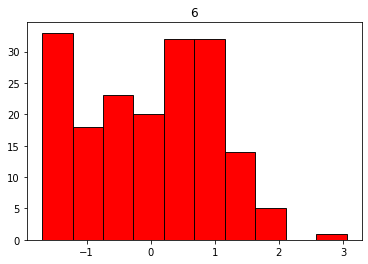

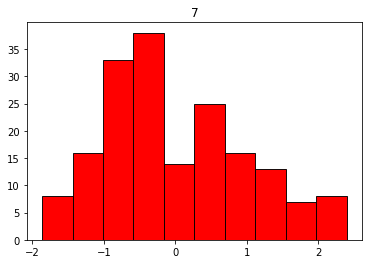

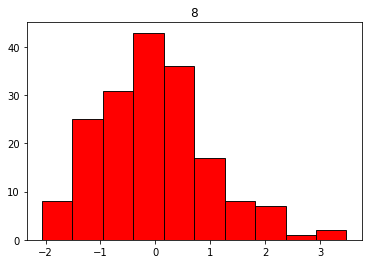

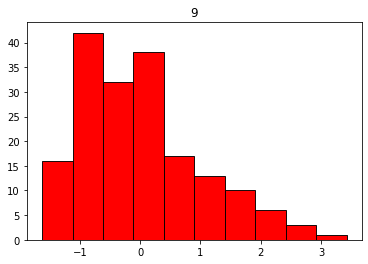

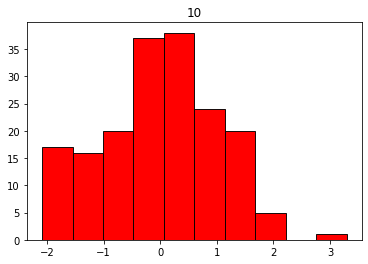

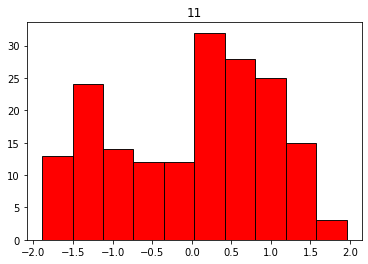

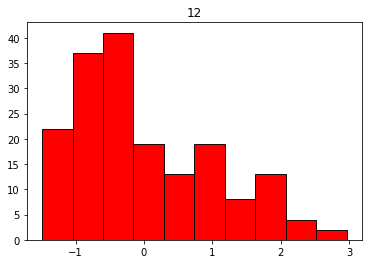

In [ ]:
for atributo in df_dataset.columns[:-1]:

    # cria o histograma
    n, bins, patches = plt.hist(df_dataset[atributo].values,bins=10, color='red', edgecolor='black', linewidth=0.9)

    # cria um título para o gráfico
    plt.title(atributo)

    # mostra o gráfico
    plt.show()

Agora, pode-se usar um gráfico de densidade para fazer o mesmo tipo de análise.

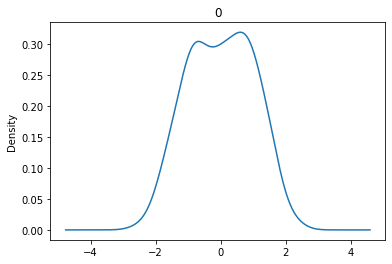

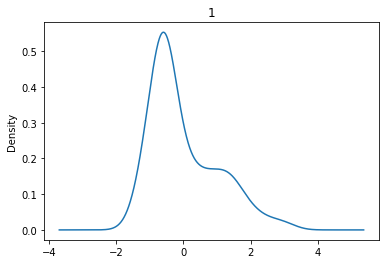

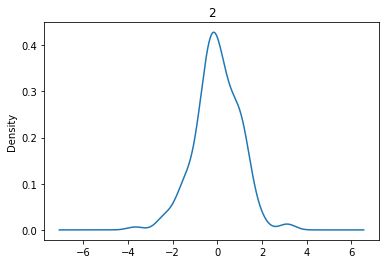

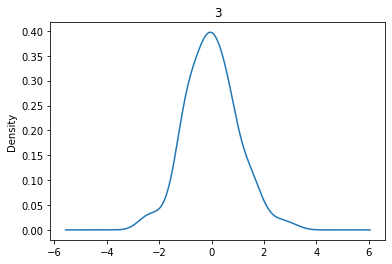

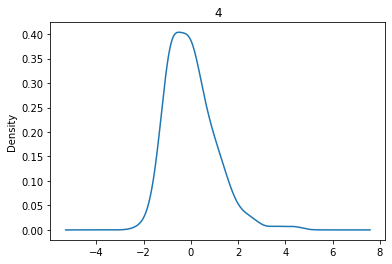

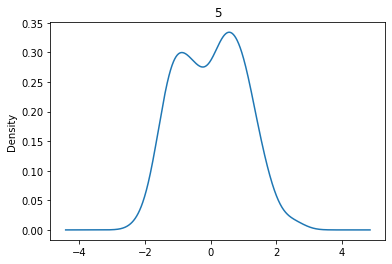

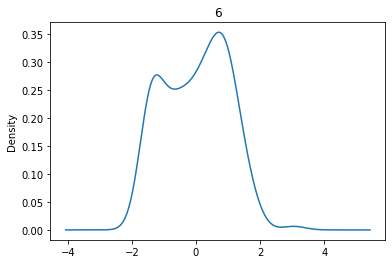

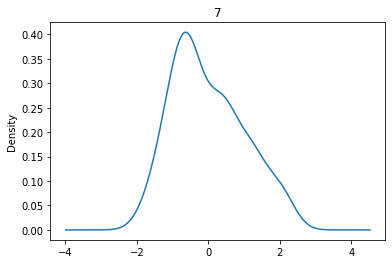

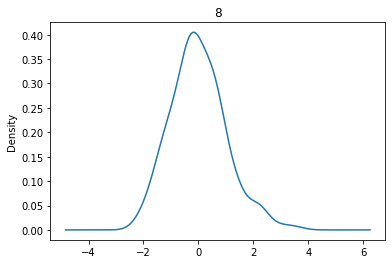

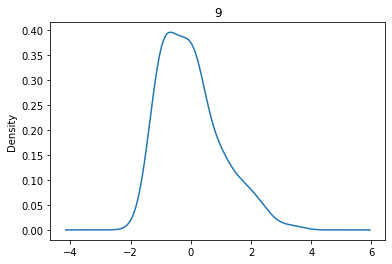

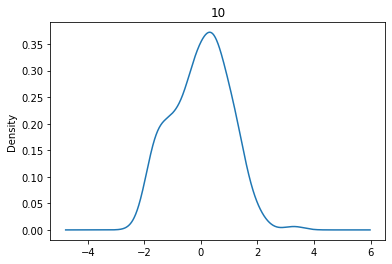

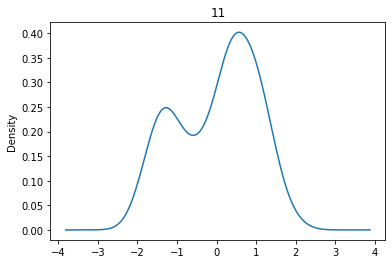

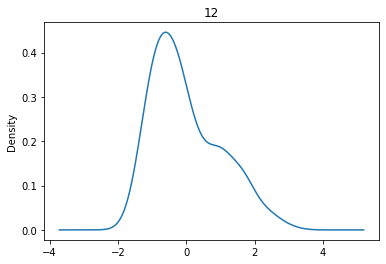

In [ ]:
for atributo in df_dataset.columns[:-1]:

    # criando o gráfico de densidade para cada atributo
    densityplot = df_dataset[atributo].plot(kind='density')

    # cria um título para o gráfico
    plt.title(atributo)

    # mostra o gráfico
    plt.show()

Conforme pode-se ver pelos gráficos de densidade, boa parte dos atributos estão próximos de 0. Portanto, as duas amostras que contém valores próximos de 6 nesses atributos, podem ser consideradas *outliers*.

Uma das maneiras mais simples de tratar *outliers* é remover aqueles valores que são menores que $Q1 - 1.5 * IQR$ ou maiores que $Q3 + 1.5 * IQR$, onde $Q1$ é o primeiro quartil, $Q3$ é o terceiro quartil e $IQR$ é o intervalo interquartil. O IQR pode ser calculado pela seguinte equação: $IQR = Q3-Q1$.

Com base nessas informações, vamos usar a função abaixo para remover os *outliers* da base de dados. Usaremos como base o IQR de cada atributo em relação a todos os valores na base de dados, em vez do IQR individual de cada classe.

In [ ]:
def removeOutliers(df_dataset):
    """
    Remove os outliers da base de dados
    """

    for atributo in df_dataset.columns[:-1]:

        # obtem o terceiro e o primeiro quartil.
        q75, q25 = np.percentile(df_dataset[atributo].values, [75 ,25])

        # calcula o IQR
        IQR = q75 - q25

        # remove os outliers com base no valor do IQR
        df_dataset = df_dataset[ (df_dataset[atributo]<=(q75+1.5*IQR)) & (df_dataset[atributo]>=(q25-1.5*IQR)) ]

    return df_dataset

# remove os outliers
df_dataset = removeOutliers( df_dataset )

# # apresenta as principais estatísticas sobre a base de dados
# df_dataset.boxplot(figsize=(15,7))
# plt.show()

# # matriz de gráficos scatter
# sns.pairplot(df_dataset, hue=13, height=3.5);

# # mostra o gráfico usando a função show() da matplotlib
# plt.show()

**Por questão de tempo de execução, a parte final do bloco que gera os gráficos está comentada. Caso precise, basta descomentar (selecionando a parte necessária e clicando "ctrl+/") e então executar o bloco.

Depois da remoção, o box plot e os gráficos de dispersão indicam que ainda há alguns poucos *outliers* na base de dados e estes não iremos tratar.

## Pré-processamento: distribuição das classes

Outro passo importante na análise de dados é verificar a distribuição das classes. Para isso, é possível criar um gráfico de barra indicando quantas amostras de cada classe há na base de dados.

2    61
1    57
3    43
Name: 13, dtype: int64

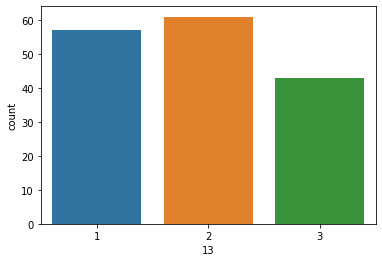

In [ ]:
display( df_dataset[13].value_counts() )

# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x=13, data=df_dataset)

# mostra o gráfico
plt.show()

Pode-se ver que as classes são relativamente balanceadas e para este exemplo iremos aceitar as quantidades. Se o número de exemplos em alguma das classes fosse muito superior às demais, seria necessário usar alguma técnica de balanceamento de classes, pois o modelo gerado pela maioira dos métodos de aprendizado supervisionado costuma ser tendencioso para as classes com maior número de amostras.

## Pré-processamento: correlação entre os atributos

Quando dois atributos possuem valores idênticos ou muito semelhantes para todas as amostras, um deles deve ser eliminado ou eles devem ser combinados. Isso ajuda a diminuir o custo computacional das tarefas de aprendizado e evita que o aprendizado de alguns método seja prejudicado, principalmente os métodos baseados em otimização.

Uma das maneiras mais comuns de analisar a correlação dos dados é através das matrizes de correlação e covariância. Pode-se fazer isso usando a biblioteca `Numpy` ou a `Pandas`.

Primeiro, será usatilizada a `Numpy`.

In [ ]:
# criando uma matriz X com os valores do data frame
X = df_dataset.iloc[:,:-1].values

# matriz de covariancia
covariance = np.cov(X, rowvar=False)

# matriz de correlação
correlation = np.corrcoef(X, rowvar=False)

print('Matriz de covariância: ')
display(covariance)

print('\n\nMatriz de correlação: ')
display(correlation)

Matriz de covariância: 


array([[ 0.95036344,  0.08884609,  0.19371747, -0.2938274 ,  0.35655946,
         0.31899444,  0.28980299, -0.16725499,  0.18857117,  0.49017135,
        -0.00971615,  0.10629422,  0.64190173],
       [ 0.08884609,  0.88914256,  0.15276066,  0.26118726,  0.02468218,
        -0.35010833, -0.42642471,  0.27656793, -0.20485497,  0.26665815,
        -0.52232061, -0.3785432 , -0.17328626],
       [ 0.19371747,  0.15276066,  0.77760675,  0.25184843,  0.32244012,
         0.09397556,  0.03801417,  0.07819044,  0.02457565,  0.17286015,
        -0.03619984, -0.02914825,  0.24193337],
       [-0.2938274 ,  0.26118726,  0.25184843,  0.79313288, -0.13679493,
        -0.40548904, -0.44402033,  0.296742  , -0.24630747, -0.02626027,
        -0.26970742, -0.3361816 , -0.42462225],
       [ 0.35655946,  0.02468218,  0.32244012, -0.13679493,  0.75392863,
         0.20894289,  0.16993203, -0.20044128,  0.07764653,  0.28002281,
        -0.01787852,  0.01867636,  0.39398829],
       [ 0.31899444, -0.350108



Matriz de correlação: 


array([[ 1.        ,  0.09665131,  0.22534291, -0.33843436,  0.42123261,
         0.3255994 ,  0.30255675, -0.17527505,  0.21546287,  0.54085531,
        -0.01047995,  0.10851222,  0.65242484],
       [ 0.09665131,  1.        ,  0.1837155 ,  0.31102358,  0.03014621,
        -0.36945547, -0.46026241,  0.29964151, -0.24199301,  0.30419159,
        -0.58245351, -0.39952469, -0.18208964],
       [ 0.22534291,  0.1837155 ,  1.        ,  0.32069062,  0.42111814,
         0.10604258,  0.04387472,  0.09058567,  0.03104324,  0.21085937,
        -0.04316547, -0.03289624,  0.27184576],
       [-0.33843436,  0.31102358,  0.32069062,  1.        , -0.17690165,
        -0.45305559, -0.50743301,  0.34040184, -0.30806803, -0.03171789,
        -0.31844154, -0.3756772 , -0.47242903],
       [ 0.42123261,  0.03014621,  0.42111814, -0.17690165,  1.        ,
         0.23944613,  0.19918608, -0.23583481,  0.09960909,  0.34690162,
        -0.02165092,  0.02140627,  0.44959865],
       [ 0.3255994 , -0.369455

Agora, serão calculadas as matrizes de correlação e covariância usando a `Pandas`.

In [ ]:
# matriz de covariancia
df_covariance = df_dataset.cov()

# matriz de correlação
df_correlation = df_dataset.corr()

print('Matriz de covariância: ')
display(df_covariance)

print('\n\nMatriz de correlação: ')
display(df_correlation)

Matriz de covariância: 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.950363,0.088846,0.193717,-0.293827,0.356559,0.318994,0.289803,-0.167255,0.188571,0.490171,-0.009716,0.106294,0.641902,-0.280969
1,0.088846,0.889143,0.152761,0.261187,0.024682,-0.350108,-0.426425,0.276568,-0.204855,0.266658,-0.522321,-0.378543,-0.173286,0.338948
2,0.193717,0.152761,0.777607,0.251848,0.322440,0.093976,0.038014,0.078190,0.024576,0.172860,-0.036200,-0.029148,0.241933,-0.047950
3,-0.293827,0.261187,0.251848,0.793133,-0.136795,-0.405489,-0.444020,0.296742,-0.246307,-0.026260,-0.269707,-0.336182,-0.424622,0.402389
4,0.356559,0.024682,0.322440,-0.136795,0.753929,0.208943,0.169932,-0.200441,0.077647,0.280023,-0.017879,0.018676,0.393988,-0.170987
5,0.318994,-0.350108,0.093976,-0.405489,0.208943,1.009972,0.871526,-0.489423,0.579244,-0.061562,0.450678,0.713303,0.522775,-0.594030
6,0.289803,-0.426425,0.038014,-0.444020,0.169932,0.871526,0.965389,-0.575008,0.650845,-0.156273,0.550993,0.774750,0.519941,-0.680361
7,-0.167255,0.276568,0.078190,0.296742,-0.200441,-0.489423,-0.575008,0.958138,-0.378525,0.100397,-0.260210,-0.517249,-0.306744,0.387499
8,0.188571,-0.204855,0.024576,-0.246307,0.077647,0.579244,0.650845,-0.378525,0.805965,-0.034771,0.295151,0.528472,0.332678,-0.422346
9,0.490171,0.266658,0.172860,-0.026260,0.280023,-0.061562,-0.156273,0.100397,-0.034771,0.864259,-0.428709,-0.397720,0.338520,0.167567




Matriz de correlação: 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.096651,0.225343,-0.338434,0.421233,0.325599,0.302557,-0.175275,0.215463,0.540855,-0.010480,0.108512,0.652425,-0.366803
1,0.096651,1.000000,0.183716,0.311024,0.030146,-0.369455,-0.460262,0.299642,-0.241993,0.304192,-0.582454,-0.399525,-0.182090,0.457475
2,0.225343,0.183716,1.000000,0.320691,0.421118,0.106043,0.043875,0.090586,0.031043,0.210859,-0.043165,-0.032896,0.271846,-0.069204
3,-0.338434,0.311024,0.320691,1.000000,-0.176902,-0.453056,-0.507433,0.340402,-0.308068,-0.031718,-0.318442,-0.375677,-0.472429,0.575033
4,0.421233,0.030146,0.421118,-0.176902,1.000000,0.239446,0.199186,-0.235835,0.099609,0.346902,-0.021651,0.021406,0.449599,-0.250621
5,0.325599,-0.369455,0.106043,-0.453056,0.239446,1.000000,0.882622,-0.497526,0.642021,-0.065892,0.471543,0.706372,0.515427,-0.752270
6,0.302557,-0.460262,0.043875,-0.507433,0.199186,0.882622,1.000000,-0.597872,0.737851,-0.171084,0.589664,0.784737,0.524336,-0.881268
7,-0.175275,0.299642,0.090586,0.340402,-0.235835,-0.497526,-0.597872,1.000000,-0.430748,0.110328,-0.279525,-0.525896,-0.310505,0.503821
8,0.215463,-0.241993,0.031043,-0.308068,0.099609,0.642021,0.737851,-0.430748,1.000000,-0.041662,0.345698,0.585839,0.367174,-0.598729
9,0.540855,0.304192,0.210859,-0.031718,0.346902,-0.065892,-0.171084,0.110328,-0.041662,1.000000,-0.484898,-0.425764,0.360802,0.229396


Para o exemplo não temos atributos com alta covariância e alta correlação que levem a necessidade de combinar esses atributos. Se a correlação entre dois atributos for igual a 1 ou -1, significa que eles são redundantes e um deles poderia ser eliminado.

Para facilitar a visualização, será plotada a matriz de covariância e a de correlação usando mapas de cores.

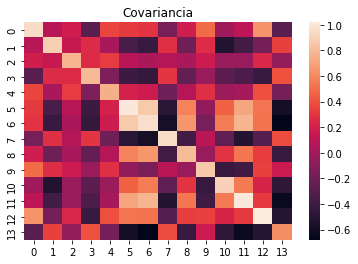

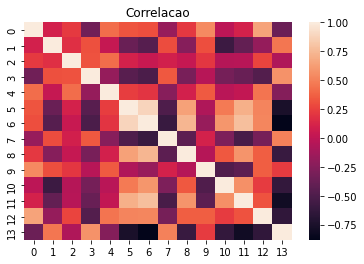

In [ ]:
# cria um mapa de cores dos valores da covariancia
sns.heatmap(df_covariance,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Covariancia')
plt.show()

# cria um mapa de cores dos valores da correlação
sns.heatmap(df_correlation,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlacao')
plt.show()

Agora com a base de dados devidamente tratada, iremos utilizá-la nos algoritmos KNN e Rede MLP.

# Aplicação ao KNN

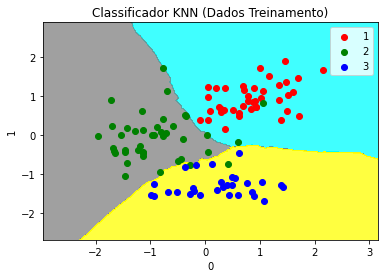

In [ ]:
# Algoritmo de Aprendizagem dos Vizinhos Mais Próximos (K-NN)

# Importando Biliotecas Importantes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importando algumas funções para este código
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

# Usando a base Wine tratada
dataset = df_dataset

# Definindo as colunas 0 e 6 como atributos descritivos
X = dataset.iloc[:, [0, 6]].values
# Definindo a coluna 13 como atributo Classe (Preditivo)
y = dataset.iloc[:, 13].values

# Separando o conjunto de dados em conjunto de treinamento e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Normalizando os dados (já estão normalizados)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Gerando o Classificador com os dados de treinamento

classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(X_train, y_train)

# Realizando a Predição das Classes dos dados do conjunto de teste
y_pred = classifier.predict(X_test)

# Gerando a Matriz de Confusão com os dados de teste
cm = confusion_matrix(y_test, y_pred)

# Vizualização dos Resultados sobre o Conjunto de Treinamento
# Uso da biblioteca Matplotlib
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('cyan', 'gray', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Classificador KNN (Dados Treinamento)')
plt.xlabel('0')
plt.ylabel('1')
plt.legend()
# plt.show()

Relatório de Classificação do KNeighborsClassifier(n_neighbors=15):
              precision    recall  f1-score   support

           1       0.89      1.00      0.94        16
           2       1.00      0.89      0.94        19
           3       1.00      1.00      1.00        14

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49


Matriz de Confusão:
[[16  0  0]
 [ 2 17  0]
 [ 0  0 14]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


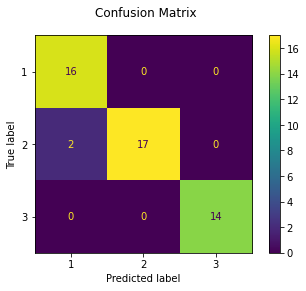

In [ ]:
predicted = classifier.predict(X_test)
print(f"Relatório de Classificação do {classifier}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Matriz de Confusão:\n{disp.confusion_matrix}")
plt.show()

Escolhendo apenas dois atributos, a melhor combinação encontrada foi utilizando os atributos das colunas 0 e 6 que seriam 1) Alcohol e 7) Flavanoids. Com esta escolha de atributos e combinada ao k = 15, temos acima uma acurácia de 96%.
O número de vizinhos k escolhido foi o 15 já que para valores menores ou maiores que este, a acurácia diminui.


Ao usarmos todos os atributos disponíveis encontraremos uma acurácia de 98%. Poderíamos assumir esta como a maior possível e é uma ótima acurácia. Porém com uma combinação específica dos atributos, é possível aumentar ainda mais.

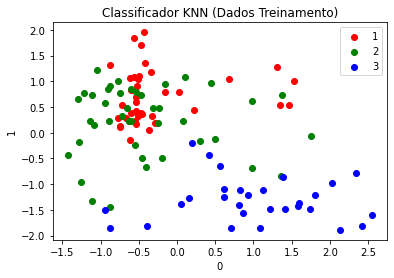

In [ ]:
# Algoritmo de Aprendizagem dos Vizinhos Mais Próximos (K-NN)

# Importando Biliotecas Importantes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importando algumas funções para este código
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

# Usando a base Wine tratada
dataset = df_dataset

# Definindo as colunas 1, 11 e 12 como atributos descritivos
X = dataset.iloc[:, [1, 11, 12]].values
# Definindo a coluna 13 como atributo Classe (Preditivo)
y = dataset.iloc[:, 13].values

# Separando o conjunto de dados em conjunto de treinamento e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Normalizando os dados (já estão normalizados)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Gerando o Classificador com os dados de treinamento

classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

# Realizando a Predição das Classes dos dados do conjunto de teste
y_pred = classifier.predict(X_test)

# Gerando a Matriz de Confusão com os dados de teste
cm = confusion_matrix(y_test, y_pred)

# Vizualização dos Resultados sobre o Conjunto de Treinamento
# Uso da biblioteca Matplotlib
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('cyan', 'gray', 'yellow')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Classificador KNN (Dados Treinamento)')
plt.xlabel('0')
plt.ylabel('1')
plt.legend()
plt.show()

Relatório de Classificação do KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        14

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49


Matriz de Confusão:
[[16  0  0]
 [ 0 19  0]
 [ 0  0 14]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


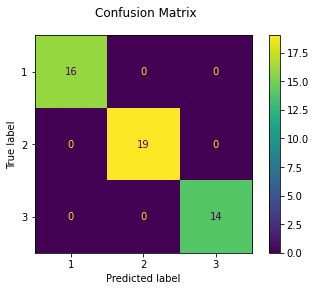

In [ ]:
predicted = classifier.predict(X_test)
print(f"Relatório de Classificação do {classifier}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Matriz de Confusão:\n{disp.confusion_matrix}")
plt.show()

Como podemos ver, usando os atributos 1, 11 e 12 sendo 2) Malic acid, 12)OD280/OD315 of diluted wines e 13)Proline respectivamente, conseguimos uma acurácia de 100%. Para esta combinação, o valor de k utilizado foi igual a 3. Quando alteramos o k para baixo ou para cima a acurácia irá diminuir. Sendo assim então, esta foi uma boa combinação encontrada.

Existem outras combinações possíveis que entregaram 100% de acurácia e que também aceitaram um intervalo de k maior sem alterar esta. Por exemplo uma combinação seria os atributos 0, 1, 6, 11 e 12. Porém, com o mínimo de atributos, a combinação mostrada mais acima foi a melhor encontrada nos testes.

Com isso podemos concluir que não precisamos de todos os atributos desta base de dados para fazer a predição no algoritmo KNN.

---
# Aplicando ao MLP

In [ ]:
%matplotlib inline

print(__doc__)
# Author original da versão para SVMs: Gael Varoquaux
# License: BSD 3 clause
# Modificado por Talles Medeiros para redes MLPs
# Importando matplotlib
import matplotlib.pyplot as plt
# Importando conjunto de dados, classificadores e métricas de desempenho
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

Automatically created module for IPython interactive environment


In [ ]:
# Atribuindo os dados do dataset ao problema
data = df_dataset
# Transformando a matriz 2D (8x8) em array unidimensional (64)
# n_samples = len(digits.images)
# data = digits.images.reshape((n_samples, -1))
# Creando uma rede MLP
# Definindo a rede:
# hidden_layer_sizes: tupla, tamanho = n_camadas - 2, default=(100,)
# alpha: float, default=0.0001
# learning_rate: {‘constant’, ‘invscaling’, ‘adaptive’}, default=’constant’
# learning_rate_init: double, default=0.001
# max_iter: int, default=200
# early_stopping: bool, default=False
# tol: float, default=1e-4
clf = MLPClassifier(solver='lbfgs', alpha=0.0001, random_state=1, max_iter=2000,
early_stopping=True, hidden_layer_sizes=[5])

# Definindo as colunas de atributos descritivos
X = data.iloc[:, [0, 1, 6, 11, 12]].values
# Definindo a coluna 13 como atributo Classe (Preditivo)
y = data.iloc[:, 13].values

# Dividindo o conjundo de Dados
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, shuffle=True)
# Treinar o modelo com o conjunto de treinamento
clf.fit(X_train, y_train)
# Prever a classe do dígito com o subconjunto de teste
predicted = clf.predict(X_test)


In [ ]:
print(f"Relatório de Classificação do {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Relatório de Classificação do MLPClassifier(early_stopping=True, hidden_layer_sizes=[5], max_iter=2000,
              random_state=1, solver='lbfgs'):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        12

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49




Matriz de Confusão:
[[19  0  0]
 [ 0 18  0]
 [ 0  0 12]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


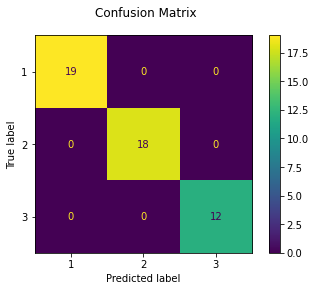

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Matriz de Confusão:\n{disp.confusion_matrix}")
plt.show()


Para esta predição utilizamos a combinação dos atributos 0, 1, 6, 11 e 12. Utilizando todos os atributos teremos praticamente os mesmos resultados.
Utilizando o solver 'lbfgs', apenas 5 neurônios e alpha = 0.0001, obtivemos uma acurácia variante entre 92%-100%, sendo a ocorrência de 96% e 100% maior. Ao aumentarmos o alpha, percebeu-se que acurácias menores ocorriam com maior frequência. Para os outros solvers ‘sgd’ e ‘adam’, utilizando a mesma configuração, obtivemos resultados insatisfatórios sendo muito inferiores ao 'lbfgs'. Para que estes solvers pudessem se aproximar do utilizado, foi necessário utilizar de mais de 100 neurônios, enquanto que o 'lbfgs' mostrou que apenas 5 foram suficientes.

A questão da variação de acurácia se deve a aleatorização aplicada a predição. Como não utilizamos todos os atributos, podemos assim como no algoritmo KNN, concluir que também não precisamos de todos os atributos para a predição na Rede MLP.

---
## Conclusão

Foram feitas principais etapas de visualização, interpretação e pré-processamento dos dados. Não haviam atributos irrelevantes e portanto sem necessidade de tratar dados faltantes, redundantes ou inconsistentes. Além disso, foi feita a normalização dos dados. Ainda, foi feita uma das técnicas de remoção de outliers, e então visualizamos a distribuição das classes e analisamos a correlação dos atributos.

Por fim então, aplicamos os dados tratados aos algoritmos KNN com hyperparâmentro igual a 15 e também aplicamos a Rede MLP. Usamos 70% da base para treinamento de ambos algoritmos e os 30% restantes foram destinados a predição de teste.

---
## Referências

[1] R. A. Fisher. The use of multiple measurements in taxonomic problems. Annual Eugenics, 7, Part II, 179-188 (1936). DOI: [10.1111/j.1469-1809.1936.tb02137.x](http://dx.doi.org/10.1111/j.1469-1809.1936.tb02137.x).

[2] A. C. P. L. F. de Carvalho, et al. Inteligência Artificial - Uma Abordagem de Aprendizado de Máquina, 2a Edição, Rio de Janeiro, LTC, 2022.

---